In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import difflib # to find the closest match from the given input
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [2]:
#loading the dataset
movie_data = pd.read_csv("dataset/movies.csv")
movie_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [3]:
movie_data.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [4]:
movie_data.drop(columns='homepage', inplace=True)
movie_data.isnull().sum()

index                     0
budget                    0
genres                   28
id                        0
keywords                412
original_language         0
original_title            0
overview                  3
popularity                0
production_companies      0
production_countries      0
release_date              1
revenue                   0
runtime                   2
spoken_languages          0
status                    0
tagline                 844
title                     0
vote_average              0
vote_count                0
cast                     43
crew                      0
director                 30
dtype: int64

In [5]:
movie_data[movie_data['release_date'].isna()











]

,index,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
4553,4553,0,NaN,380097,NaN,en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],...,0.0,[],Released,NaN,America Is Still the Place,0.0,0,NaN,[],NaN


In [6]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4391 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
popular_movies = movie_data.sort_values(by='popularity' ,ascending=False)

In [8]:
popular_movies.head()

,index,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
546,546,74000000,Family Animation Adventure Comedy,211672,assistant aftercreditsstinger duringcreditssti...,en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,Sandra Bullock Jon Hamm Michael Keaton Allison...,"[{'name': 'Christopher Meledandri', 'gender': ...",Kyle Balda
95,95,165000000,Adventure Drama Science Fiction,157336,saving the world artificial intelligence fathe...,en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,Matthew McConaughey Jessica Chastain Anne Hath...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
788,788,58000000,Action Adventure Comedy,293660,anti hero mercenary marvel comic superhero bas...,en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,Ryan Reynolds Morena Baccarin Ed Skrein T.J. M...,"[{'name': 'Ronna Kress', 'gender': 1, 'departm...",Tim Miller
94,94,170000000,Action Science Fiction Adventure,118340,marvel comic spaceship space outer space orphan,en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,Chris Pratt Zoe Saldana Dave Bautista Vin Dies...,"[{'name': 'Craig Wood', 'gender': 2, 'departme...",James Gunn
127,127,150000000,Action Adventure Science Fiction Thriller,76341,future chase post-apocalyptic dystopia australia,en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,Tom Hardy Charlize Theron Nicholas Hoult Hugh ...,"[{'name': 'Iain Smith', 'gender': 2, 'departme...",George Miller


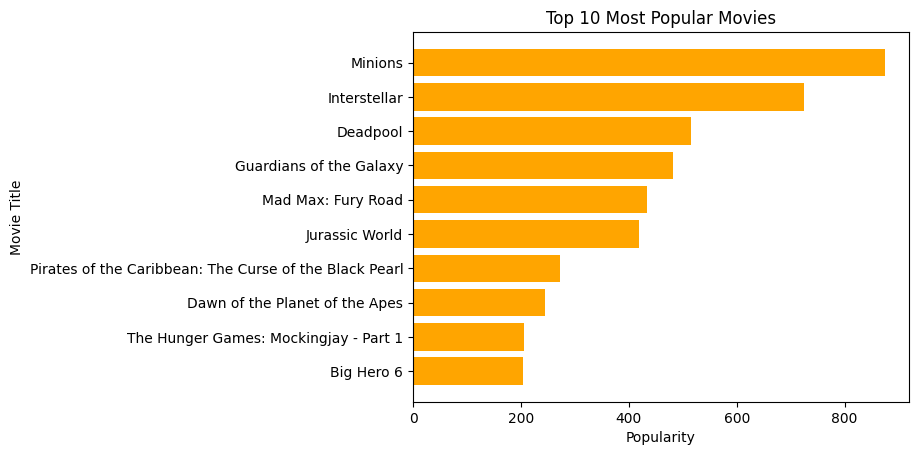

In [10]:
#plotting the most popular movies using the matplotlib horizontal bargraph 
plt.barh(popular_movies['title'][:10], popular_movies['popularity'][:10], align='center', color='orange')
plt.title('Top 10 Most Popular Movies')
plt.ylabel('Movie Title')
plt.xlabel('Popularity')
plt.gca().invert_yaxis()
plt.show()

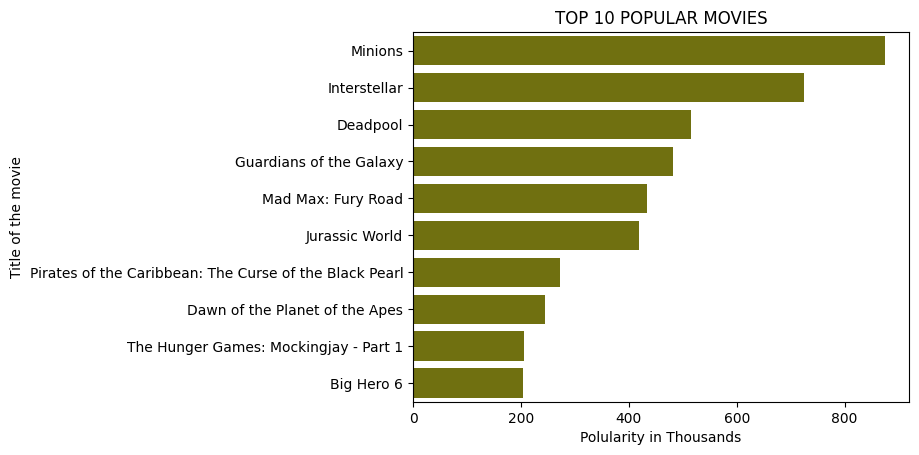

In [11]:
# plotting using seaborn
import seaborn as sns

sns.barplot(x='popularity', y='title', data=popular_movies[:10], color="olive")
plt.xlabel("Polularity in Thousands")
plt.ylabel("Title of the movie")
plt.title("TOP 10 POPULAR MOVIES")
plt.show()

In [12]:
#data preprocessing
# replacing the null values for the required features table
movie_data.head()

,index,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [13]:
#select the features required for the purpose of finding the simlarity
columns = movie_data.columns.to_list()

columns

['index',
 'budget',
 'genres',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'cast',
 'crew',
 'director']

In [14]:
#the selected features from the list of features above are
features = ['genres', 'keywords', 'overview', 'tagline','title','director', 'cast']
features

['genres', 'keywords', 'overview', 'tagline', 'title', 'director', 'cast']

In [15]:
#replace the null values with empty string for the above selected features
for feature in features:
    movie_data[feature] = movie_data[feature].fillna("")

In [16]:
movie_data.isnull().sum()

index                   0
budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
director                0
dtype: int64

In [17]:
# comnbine all the words in the selected features columns
selected_features = ''
for feature in features:
    selected_features += movie_data[feature] + " "

selected_features

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      When ambitious New York attorney Sam is sent...
4802    Documentary obsession camcorder crush dream gi...
Name: genres, Length: 4803, dtype: object

In [18]:
#now we make sure the common occuring words like a, an, the and other similart words are not used while performing the similarity test
tfidf = TfidfVectorizer(stop_words='english')

#we use the fit_transform method to fit the data and transform it into a matrix of TF-ID
tfidf_matrix = tfidf.fit_transform(selected_features)

tfidf_matrix.shape

(4803, 31064)

In [19]:
#finding the similarity using the cosine similarity

similarity = cosine_similarity(tfidf_matrix)

In [20]:
print(similarity.shape, similarity)

(4803, 4803) [[1.         0.03009663 0.01871827 ... 0.00373273 0.01751058 0.        ]
 [0.03009663 1.         0.01152996 ... 0.01908219 0.01651664 0.        ]
 [0.01871827 0.01152996 1.         ... 0.00763343 0.03446988 0.        ]
 ...
 [0.00373273 0.01908219 0.00763343 ... 1.         0.01144328 0.02846845]
 [0.01751058 0.01651664 0.03446988 ... 0.01144328 1.         0.0080098 ]
 [0.         0.         0.         ... 0.02846845 0.0080098  1.        ]]


In [21]:
list(similarity[1])

[0.030096626621868548,
 1.0000000000000002,
 0.011529961651065188,
 0.0024940341267357573,
 0.06006118636181499,
 0.032284110009582444,
 0.0085316745730853,
 0.036056943715071114,
 0.034804805458406404,
 0.022457786490484247,
 0.026123283998393435,
 0.01349538726097595,
 0.42541806980028857,
 0.07221115027982807,
 0.05425268064437086,
 0.01655560297715487,
 0.030144660581588316,
 0.13645560692420988,
 0.008655094439534484,
 0.03390800742224221,
 0.03250908551435003,
 0.0105624552215062,
 0.013042759009892269,
 0.021063063708077347,
 0.03356830036574204,
 0.016261711192945578,
 0.04950899833411572,
 0.06886493028414284,
 0.03877928939514663,
 0.01671592839861665,
 0.028569148114569023,
 0.023924103925959065,
 0.04598582650203123,
 0.012739480828212735,
 0.0,
 0.02030633172740164,
 0.01727696450574659,
 0.013906683658296604,
 0.029271304336834034,
 0.01930884870159498,
 0.025056733653777884,
 0.018225969596444805,
 0.0,
 0.05069465747243526,
 0.00414525034162109,
 0.039746808246516975,
 

In [22]:
list(enumerate(similarity[1]))

[(0, 0.030096626621868548),
 (1, 1.0000000000000002),
 (2, 0.011529961651065188),
 (3, 0.0024940341267357573),
 (4, 0.06006118636181499),
 (5, 0.032284110009582444),
 (6, 0.0085316745730853),
 (7, 0.036056943715071114),
 (8, 0.034804805458406404),
 (9, 0.022457786490484247),
 (10, 0.026123283998393435),
 (11, 0.01349538726097595),
 (12, 0.42541806980028857),
 (13, 0.07221115027982807),
 (14, 0.05425268064437086),
 (15, 0.01655560297715487),
 (16, 0.030144660581588316),
 (17, 0.13645560692420988),
 (18, 0.008655094439534484),
 (19, 0.03390800742224221),
 (20, 0.03250908551435003),
 (21, 0.0105624552215062),
 (22, 0.013042759009892269),
 (23, 0.021063063708077347),
 (24, 0.03356830036574204),
 (25, 0.016261711192945578),
 (26, 0.04950899833411572),
 (27, 0.06886493028414284),
 (28, 0.03877928939514663),
 (29, 0.01671592839861665),
 (30, 0.028569148114569023),
 (31, 0.023924103925959065),
 (32, 0.04598582650203123),
 (33, 0.012739480828212735),
 (34, 0.0),
 (35, 0.02030633172740164),
 (36

In [23]:
# getting the input from the user 
user_movie = input("Enter the name of the movie: ")
print(user_movie)

avatar


In [24]:
#find the closet match to the movie entered by the user
# we use the difflib library to match the closest match to the user input movie name
list_of_all_the_movie_titles = movie_data['title'].tolist()
closest_match = difflib.get_close_matches(user_movie, list_of_all_the_movie_titles)
print(closest_match)

['Avatar']


In [25]:
# now we need to find how much similar the movie user inputted is to othr movies using the similarity that we found using the cosine similarity

# we will use the similarity to find the top 10 most similar movies

# first find the index of the movie that was the closest match

index_of_the_movie = movie_data[movie_data.title == closest_match[0]].index.values[0]
index_of_the_movie

0

In [26]:
# now we need to find the the movies that are similar to the 68h movie in the similarity_matrix array and sort the top 10

similarity_score = list(enumerate(similarity[index_of_the_movie]))
similarity_score

[(0, 1.0),
 (1, 0.030096626621868548),
 (2, 0.018718270805448585),
 (3, 0.01632993453585481),
 (4, 0.056269702945293404),
 (5, 0.0416570222460309),
 (6, 0.00558104739328762),
 (7, 0.04015233389784478),
 (8, 0.011162867307365813),
 (9, 0.021149494724541838),
 (10, 0.03540126532291348),
 (11, 0.020516782917312747),
 (12, 0.01568711308145299),
 (13, 0.010434373828688507),
 (14, 0.04045004258360657),
 (15, 0.008074918723929618),
 (16, 0.023642782169238305),
 (17, 0.016492337757269965),
 (18, 0.041044148356584514),
 (19, 0.009587376693006766),
 (20, 0.010292520492861985),
 (21, 0.006909495044111433),
 (22, 0.009607741381445097),
 (23, 0.023975076189229175),
 (24, 0.012307947546352862),
 (25, 0.012975916477955143),
 (26, 0.05794575441128825),
 (27, 0.06252282466575054),
 (28, 0.025905350278983073),
 (29, 0.032936585577447594),
 (30, 0.02989308410398222),
 (31, 0.05731540690935171),
 (32, 0.015906215811527718),
 (33, 0.02111172329720428),
 (34, 0.0),
 (35, 0.039401634315913356),
 (36, 0.05909

In [27]:
# sorting the similarity score of the user input movie to find the closest match
sorted_similar_movies = sorted(similarity_score, key=lambda item: item[1], reverse=True)
sorted_similar_movies = sorted_similar_movies[1:]
sorted_similar_movies[:10]

[(3158, 0.14778909579776456),
 (1531, 0.1469176464160417),
 (1914, 0.14364162201027378),
 (56, 0.13970436345471),
 (2403, 0.13798618715182157),
 (94, 0.13490754248882308),
 (461, 0.13209676181012933),
 (1352, 0.12905359761156093),
 (661, 0.1289725477650261),
 (1354, 0.12111451227709127)]

In [28]:
# since the first one is the same movie as the user wrote down we need to show from the first index

def get_recommendations(no_of_recommendation):
    heading = "The top " + str(no_of_recommendation) + " movie recommendation based on the movie you liked"
    print(heading.upper() + "\n")

    for ind, movie in enumerate(sorted_similar_movies):

        title_from_index = movie_data[movie_data.index == movie[0]]['title'].values[0]
        print(ind+1,". ", title_from_index)
        if ind+1 >= no_of_recommendation:
            break



In [29]:
get_recommendations(20)

THE TOP 20 MOVIE RECOMMENDATION BASED ON THE MOVIE YOU LIKED

1 .  Alien
2 .  Moonraker
3 .  Lifeforce
4 .  Star Trek Beyond
5 .  Aliens
6 .  Guardians of the Galaxy
7 .  Lost in Space
8 .  Gattaca
9 .  Zathura: A Space Adventure
10 .  Space Chimps
11 .  Lockout
12 .  Gravity
13 .  Star Trek Into Darkness
14 .  Apollo 18
15 .  Space Dogs
16 .  Treasure Planet
17 .  Cargo
18 .  Trekkies
19 .  Sunshine
20 .  Moon


In [30]:
# function to find the movies titile and print the recommendations

def get_n_recommenations(user_movie, n, similarity_matrix):  # n is the number of movie you want as the part of the recommendation and we pass the similarity matrix 
    print(f"THE TOP {n} MOVIES RECOMMENDATIONS BASED ON YOUR MOVIE '{user_movie.upper()}' \n")

    for ind, movie in enumerate(similarity_matrix):
        movie_title = movie_data[movie_data.index == movie[0]]['title'].values[0]

        print(ind +1, ". ", movie_title)

        if ind+1 >= n:
            break

In [31]:
# getting all in one 

def initiate():
    # input the name of the movie
    input_movie = input("Enter the name of the movie: ")
    n = int(input("No. of movie recommndations required: "))
    # getting the closest movie of the name
    closest_movie = difflib.get_close_matches(input_movie, list_of_all_the_movie_titles) # returns a list and first one is the closest

    # finding the index of the closest_movie in the movie dataset
    index_of_the_movie = movie_data[movie_data.title == closest_movie[0]].index.values[0]

    # using the index of the movie to find the similarity_matrix that shows the movies that are similart to the movie from the index
    similarity_matrix = list(enumerate(similarity[index_of_the_movie]))

    # now we sort the similarity_matrix so that we get the movie with the hightest similarity first i.e, sorting in descending order
    similarity_matrix.sort(key=lambda x: x[1], reverse=True)

    # taking the elements from the first index as the first movie is the same movie
    similarity_matrix = similarity_matrix[1:]

    # now going through the matrix and getting the movies title witht the index in the matrix using the function above get_n_recommendation()
    get_n_recommenations(input_movie, n, similarity_matrix)



In [34]:
initiate()

THE TOP 20 MOVIES RECOMMENDATIONS BASED ON YOUR MOVIE 'ARRIVAL' 

1 .  Bobby Jones: Stroke of Genius
2 .  Doomsday
3 .  After.Life
4 .  Hannah Montana: The Movie
5 .  The Dead Zone
6 .  The Last Big Thing
7 .  28 Days Later
8 .  Get on the Bus
9 .  Cat People
10 .  Looper
11 .  Outbreak
12 .  The Last Exorcism
13 .  Videodrome
14 .  The Howling
15 .  Stonewall
16 .  Flatliners
17 .  Terminator 2: Judgment Day
18 .  Fireproof
19 .  X-Men: Days of Future Past
20 .  A Dangerous Method
